
- Consider a second order partial differential equation (PDE):
\begin{equation}
A \frac{\partial^{2}u}{\partial x^{2}} + B \frac{\partial^{2}u}{\partial x \partial y} + C \frac{\partial^{2}u}{\partial y^{2}} = 0
\end{equation}
- The value of 
\begin{equation} 
B ^{2} - 4 AC 
\end{equation}
decides if the above PDE will be elliptical ( < 0), parabolic (= 0) or hyperbolic (> 0).

**Explicit Method**
- Utilized to solve unsteady, time dependent PDEs and model their time evolution given some initial condition.
- Uses forward time step to obtain time derivative and central difference for spatial derivative.

**Caveats**
- Not suitable for very large dt values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Heat equation 1D (Example 8.1 from Applied Numerical Analysis - 6th Edition)**

Solve for the temperatures as a function of time within a large steel plate that is 2 cm thick.

For steel, k = 0.13 cal/(sec * cm * "C), c = 0.11 cal/(g " "C), and p = 7.8 g/cm3. Because the plate is large, neglect lateral flow of heat and consider only the flow perpendicular to the faces of the plate.

Initially, the temperatures within the plate, measured from the top face (where x = 0) to the bottom (where x = 2) are u(x) = 100x for x between 0 and 1 and u(x) = 200 - 100x when x between 1 and 2 the boundary conditions, both at x = 0 and at x = 2, are u = 0. Use delta x = 0.25 so there
are eight subdivisions. Number the interior nodes from 1 to 7 so that node 0 is on the top face and node 8 is at the bottom.

In [2]:
#Params
length = 2
k = 0.13
c = 0.11
rho = 7.8

dx = 0.25
ngrid = int(length/dx) 

r = 0.5      #Assumed value
dt = r * c* rho * dx**2 / k

#Spatial grid
x = np.arange(0, length+dx, dx)
num_steps = 14

print (f'dx = {dx} | dt = {dt} | ngrid = {ngrid}')
print(f'Spatial grid x: {x} with length {len(x)}')

dx = 0.25 | dt = 0.20625 | ngrid = 8
Spatial grid x: [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ] with length 9


In [3]:
#Initial conditions
u_ini = []
for i in range(len(x)):
    if x[i] <= 1:
        u_ini.append(100 * x[i])
    else:
        u_ini.append(200  - 100 * x[i])
print(f'Initial condition temperature array: {u_ini}')
print(f'Length of initial condition temperature array: {len(u_ini)}')


Initial condition temperature array: [0.0, 25.0, 50.0, 75.0, 100.0, 75.0, 50.0, 25.0, 0.0]
Length of initial condition temperature array: 9


In [4]:
#Updated temperature value at num_steps time
u_current = u_ini.copy()

for n in range (num_steps): 
    u_next = u_current.copy()
    
    #At n = 0, 1, ...., num_steps, compute u at i = 1, 2, ...., ngrid
    for i in range(1, ngrid):
        u_next[i] = r*(u_current[i+1] + u_current[i-1]) + u_current[i]*(1-2*r) 

        #Boundary conditions
        u_next[0] = 0
        u_next[-1] = 0

        u_current = u_next.copy()
  
    if n % 2 == 0:
        print(f'Temperature array at time step {n+1}: {u_current}')
   

Temperature array at time step 1: [0, 25.0, 50.0, 75.0, 75.0, 62.5, 43.75, 21.875, 0]
Temperature array at time step 3: [0, 25.0, 43.75, 53.125, 53.125, 45.3125, 32.03125, 16.015625, 0]
Temperature array at time step 5: [0, 18.75, 32.03125, 38.671875, 38.671875, 33.0078125, 23.33984375, 11.669921875, 0]
Temperature array at time step 7: [0, 13.671875, 23.33984375, 28.173828125, 28.173828125, 24.0478515625, 17.00439453125, 8.502197265625, 0]
Temperature array at time step 9: [0, 9.9609375, 17.00439453125, 20.526123046875, 20.526123046875, 17.5201416015625, 12.38861083984375, 6.194305419921875, 0]
Temperature array at time step 11: [0, 7.257080078125, 12.38861083984375, 14.954376220703125, 14.954376220703125, 12.764358520507812, 9.025764465332031, 4.512882232666016, 0]
Temperature array at time step 13: [0, 5.28717041015625, 9.025764465332031, 10.895061492919922, 10.895061492919922, 9.299516677856445, 6.575751304626465, 3.2878756523132324, 0]


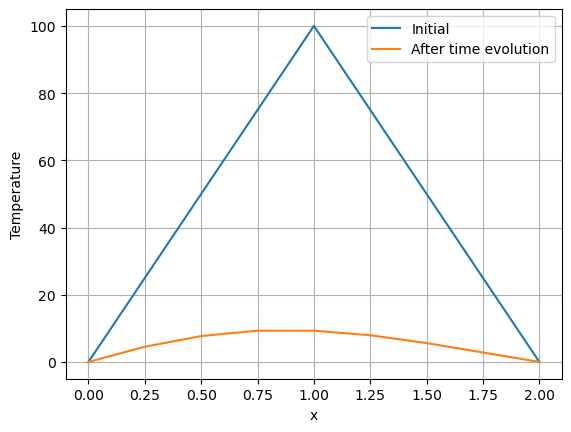

In [5]:
plt.plot(x, u_ini, label="Initial")
plt.plot(x, u_current, label="After time evolution")
plt.xlabel("x")
plt.ylabel("Temperature")
plt.grid()
plt.legend()
plt.show()

**Schrodingers equation for particle in 1D box**

Consider a particle in 1D box of length 1 unit with zero potential within the box. The wavefunction at t = 0 is assumed to be a Gaussian centered at 0.5 unit and with 0.1 standard deviation. How will this wavefunction evolve with time?

In [15]:
#Params
length = 1
dx = 0.05
ngrid = int(length/dx) 
dt = 0.0001
m = 1
hbar = 1

#Spatial grid
x = np.arange(0, length+dx, dx)
num_steps = 1000

print (f'dx = {dx} | dt = {dt} | ngrid = {ngrid}')
print(f'Spatial grid x: {x} with length {len(x)}')

dx = 0.05 | dt = 0.0001 | ngrid = 20
Spatial grid x: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] with length 21


In [16]:
#Initial conditions
sigma = 0.1
wave_ini = np.exp( - (x - length/2)**2 / (2*sigma**2))
wave_ini /= np.sqrt(np.sum(wave_ini**2) * dx)

print(f'Initial condition wave array: {wave_ini}')
print(f'Length of initial condition wave array: {len(wave_ini)}')
#plt.plot(x, wave_ini, label="Initial Condition")


Initial condition wave array: [8.85179827e-06 9.51657999e-05 7.96813487e-04 5.19587662e-03
 2.63868388e-02 1.04361972e-01 3.21457504e-01 7.71136464e-01
 1.44067258e+00 2.09616624e+00 2.37526753e+00 2.09616624e+00
 1.44067258e+00 7.71136464e-01 3.21457504e-01 1.04361972e-01
 2.63868388e-02 5.19587662e-03 7.96813487e-04 9.51657999e-05
 8.85179827e-06]
Length of initial condition wave array: 21


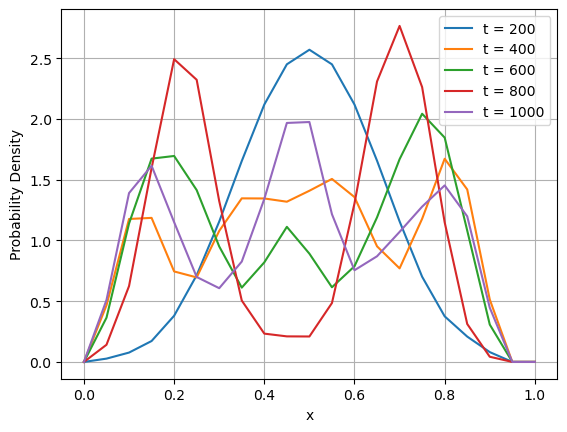

In [26]:
#Updated wavefunction value at num_steps time
wave_current = wave_ini.astype(complex)



for i in range (num_steps): 
    wave_next = wave_current.copy()

    #Boundary conditions
    wave_next[0] = 0
    wave_next[-1] = 0
    
    #At n = 0, 1, ...., num_steps, compute wave at i = 1, 2, ...., ngrid
    for j in range(1, ngrid-1):
        wave_next[j] = wave_current[j] + 1j * dt / (2 * dx**2) * (
                 wave_current[j+1] - 2*wave_current[j] + wave_current[j-1]
                   )


    wave_current = wave_next.copy()
  
    if (i + 1) % 200 == 0:
        #plt.plot(x, np.real(wave_current), label=f'Re(wave) at t={i+1}')
        #plt.plot(x, np.imag(wave_current), label=f'Im(wave) at t={i+1}')
        plt.plot(x, np.real(wave_current)**2 + np.imag(wave_current)**2, label=f't = {i+1}')
    
        plt.ylabel('Probability Density')
        plt.xlabel('x')
        plt.legend()
        plt.grid()
        #plt.show()


In [24]:
norm = np.sum(np.abs(wave_current)**2) * dx
print(norm)


1.018578357704447
